<a href="https://colab.research.google.com/github/Trcty/Spotify-data-analysis-/blob/main/1001_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DS-GA 1001 Capstone

Arthor: Zhiwen Cao, Qihang Tang, Vivian Yan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
seed = 16385369

In [ ]:
df = pd.read_csv("spotify52kData.csv")

In [ ]:
df.head()

songNumber                 artists  \
0           0             Gen Hoshino   
1           1            Ben Woodward   
2           2  Ingrid Michaelson;ZAYN   
3           3            Kina Grannis   
4           4        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration  explicit  danceability  \
0                      Comedy          73    230666     False         0.676   
1            Ghost - Acoustic          55    149610     False         0.420   
2              To Begin Again          57    210826     False         0.438   
3  Can't Help Falling In Love          71    201933     False         0.266   
4                     Hold On          82    198853     False         0.618   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0  0.4610    1    -6.746     0       0.1430        0.0322          0.000001   
1  0.1660    1   -17.235     1       0.0763        0.9240          0.000006   
2  0.3590    0    -9.734     1       0.0557        0.2100          0.000000   
3  0.0596    0   -18.515     1       0.0363        0.9050          0.000071   
4  0.4430    2    -9.681     1       0.0526        0.4690          0.000000   

   liveness  valence    tempo  time_signature track_genre  
0    0.3580    0.715   87.917               4    acoustic  
1    0.1010    0.267   77.489               4    acoustic  
2    0.1170    0.120   76.332               4    acoustic  
3    0.1320    0.143  181.740               3    acoustic  
4    0.0829    0.167  119.949               4    acoustic

In [ ]:
df.shape

(52000, 20)

In [ ]:
df.isna().sum()

songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# data preprocessing: data cleaning and transform

1. convert length of songs in minutes

In [ ]:
df['duration'] =df['duration']/1000/60

In [ ]:
df.duration

0        3.844433
1        2.493500
2        3.513767
3        3.365550
4        3.314217
           ...   
51995    3.394217
51996    3.540217
51997    3.540217
51998    2.810333
51999    3.866667
Name: duration, Length: 52000, dtype: float64

2. deal with replicated songs

In [ ]:
df['id'] = df['artists'].str.cat([df['album_name'], df['track_name']], sep=' / ')
unique_songs = df[~df.duplicated(subset='id', keep=False)]
unique_songs.shape

(40613, 21)

In [ ]:
df_cleaned = df[~df.duplicated(subset='id')]
df_cleaned.shape

(45828, 21)

In [ ]:
df_cleaned.head()

songNumber                 artists  \
0           0             Gen Hoshino   
1           1            Ben Woodward   
2           2  Ingrid Michaelson;ZAYN   
3           3            Kina Grannis   
4           4        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration  explicit  danceability  \
0                      Comedy          73  3.844433     False         0.676   
1            Ghost - Acoustic          55  2.493500     False         0.420   
2              To Begin Again          57  3.513767     False         0.438   
3  Can't Help Falling In Love          71  3.365550     False         0.266   
4                     Hold On          82  3.314217     False         0.618   

   energy  key  ...  mode  speechiness  acousticness  instrumentalness  \
0  0.4610    1  ...     0       0.1430        0.0322          0.000001   
1  0.1660    1  ...     1       0.0763        0.9240          0.000006   
2  0.3590    0  ...     1       0.0557        0.2100          0.000000   
3  0.0596    0  ...     1       0.0363        0.9050          0.000071   
4  0.4430    2  ...     1       0.0526        0.4690          0.000000   

   liveness  valence    tempo  time_signature  track_genre  \
0    0.3580    0.715   87.917               4     acoustic   
1    0.1010    0.267   77.489               4     acoustic   
2    0.1170    0.120   76.332               4     acoustic   
3    0.1320    0.143  181.740               3     acoustic   
4    0.0829    0.167  119.949               4     acoustic   

                                                  id  
0                      Gen Hoshino / Comedy / Comedy  
1  Ben Woodward / Ghost (Acoustic) / Ghost - Acou...  
2  Ingrid Michaelson;ZAYN / To Begin Again / To B...  
3  Kina Grannis / Crazy Rich Asians (Original Mot...  
4               Chord Overstreet / Hold On / Hold On  

[5 rows x 21 columns]

# Q1.

In [ ]:
song_length = df_cleaned['duration']
popularity = df_cleaned['popularity']

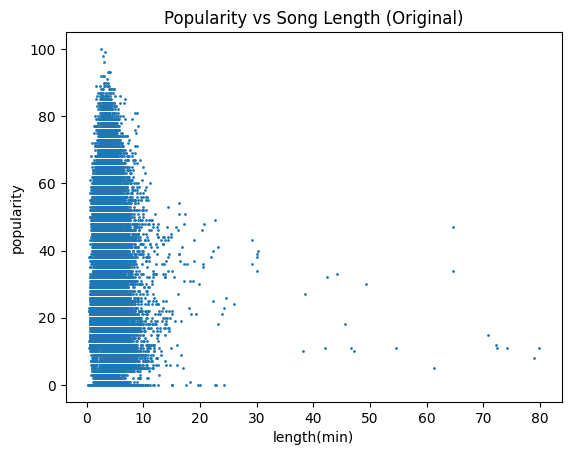

In [ ]:
plt.scatter(song_length, popularity, s=1)
plt.xlabel('length(min)')
plt.ylabel('popularity')
plt.title('Popularity vs Song Length (Original)')
plt.show()

In [ ]:
ss.pearsonr(song_length, popularity)

PearsonRResult(statistic=-0.06755868894935375, pvalue=1.6505223412519776e-47)

In [ ]:
threshold = np.percentile(song_length, 99)
threshold

9.298771500000015

In [ ]:
df_filtered = df_cleaned[df_cleaned['duration'] <= threshold]

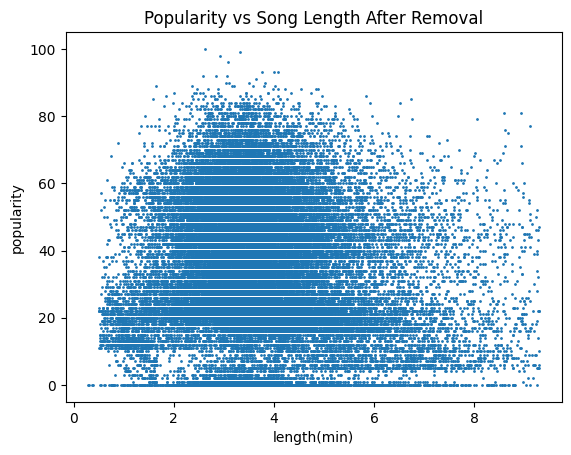

In [ ]:
song_length = df_filtered['duration']
popularity = df_filtered['popularity']
plt.scatter(song_length, popularity, s=1)
plt.xlabel('length(min)')
plt.ylabel('popularity')
plt.title('Popularity vs Song Length After Removal')
plt.show()

In [ ]:
ss.pearsonr(song_length, popularity)

PearsonRResult(statistic=-0.06272157336228741, pvalue=8.755511822434921e-41)

# Q2

In [ ]:
df2 = df_cleaned.iloc[:, [4, 6]].copy()
explicit = df2[df2['explicit']==True]['popularity']
nonexplicit = df2[df2['explicit']==False]['popularity']

In [ ]:
len(explicit), len(nonexplicit)

(5107, 40721)

In [ ]:
alpha = 0.05

In [ ]:
# signifigant, non equal var
q2_var_check = ss.levene(explicit,nonexplicit)
print(q2_var_check)
if q2_var_check.pvalue <= alpha:
    print('Unequal Variance')
else:
    print('Equal Variance')

LeveneResult(statistic=34.78128193243141, pvalue=3.7148394554060796e-09)
Unequal Variance


In [ ]:
# Welch's t-test
q2_result = ss.ttest_ind(explicit, nonexplicit, alternative = 'greater', equal_var = False)
print(q2_result)
if q2_result.pvalue <= alpha:
    print('Reject Null')
else:
    print('Cannot Reject Null')
# significant  greater

Ttest_indResult(statistic=8.959200361908877, pvalue=2.1208979143012787e-19)
Reject Null


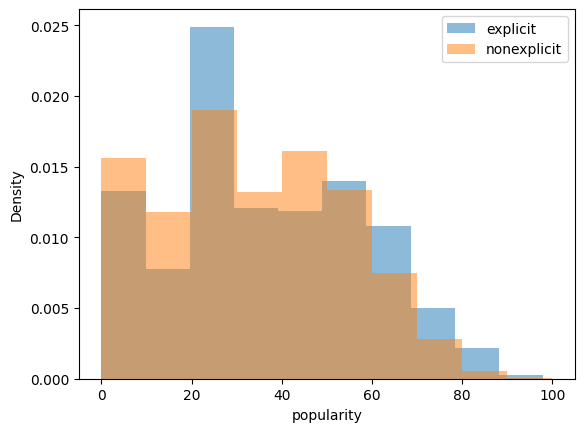

In [ ]:
plt.hist(explicit, alpha=0.5, label='explicit', density=True)
plt.hist(nonexplicit, alpha=0.5, label='nonexplicit', density = True)
plt.xlabel('popularity')
plt.ylabel('Density')
plt.legend()
plt.show()

# Q3

In [ ]:
df3 = df_cleaned.iloc[:, [4, 11]].copy()
major = df3[df3['mode']== 1]['popularity']
minor =  df3[df3['mode']== 0]['popularity']

In [ ]:
len(major), len(minor), np.mean(major), np.mean(minor)

(28721, 17107, 32.8575954876223, 33.94364879873736)

In [ ]:
q3_var_check = ss.levene(major,minor)
print(q3_var_check)
if q3_var_check.pvalue <= alpha:
    print('Unequal Variance')
else:
    print('Equal Variance')

LeveneResult(statistic=38.745812280143504, pvalue=4.869159292351772e-10)
Unequal Variance


In [ ]:
# Welch's t-test
q3_result = ss.ttest_ind(major, minor,  alternative = 'greater', equal_var = False)
print(q3_result)
if q3_result.pvalue <= alpha:
    print('Reject Null')
else:
    print('Cannot Reject Null')

Ttest_indResult(statistic=-5.372750615925296, pvalue=0.9999999609831565)
Cannot Reject Null


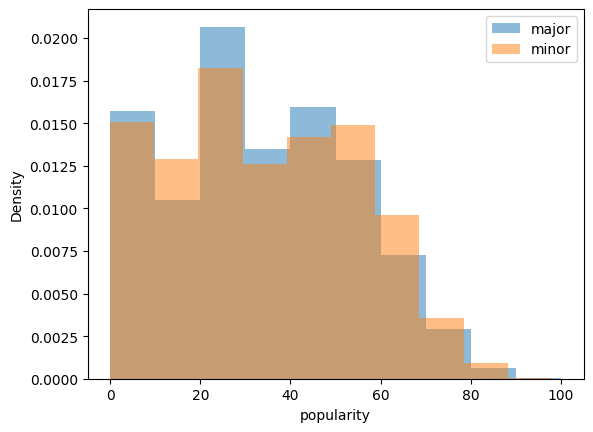

In [ ]:
plt.hist(major, alpha=0.5, label='major', density=True)
plt.hist(minor, alpha=0.5, label='minor', density = True)
plt.xlabel('popularity')
plt.ylabel('Density')
plt.legend()
plt.show()

# Q4

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
selected_feature = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence' ,'tempo']

In [ ]:
y = df_cleaned['popularity'].values.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size = 0.2, random_state = seed)

In [ ]:
X_train.shape, y_train.shape, X_test.shape

((36662, 21), (36662, 1), (9166, 21))

In [ ]:
# use cv on selected feature in x_train and y_train, choose the feature that yields the least mse
np.random.seed(seed)
ave_mse = []
for i in selected_feature:
  X = X_train[i].values.reshape(-1, 1)
  model = LinearRegression()
  cv_scores = cross_val_score(model, X, y_train, scoring='neg_mean_squared_error', cv=10)
  ave_mse.append(-cv_scores.mean())

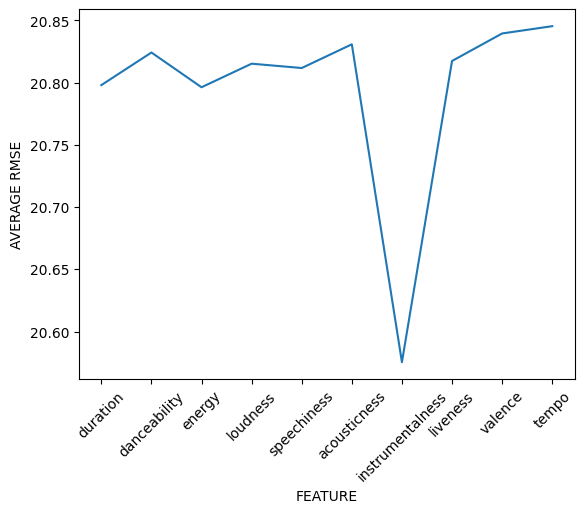

In [ ]:
plt.plot(np.sqrt(ave_mse))
plt.xticks(list(range(10)),selected_feature, rotation=45)
plt.xlabel('FEATURE')
plt.ylabel('AVERAGE RMSE')
plt.show()

In [ ]:
smallest = np.argmin(ave_mse)
selected_feature[smallest]

'instrumentalness'

In [ ]:
ave_mse
print(ave_mse[smallest]) # average mse from 10 folds cv

423.34564606433617


In [ ]:
model = LinearRegression()
model.fit(X_train['instrumentalness'].values.reshape(-1, 1), y_train)

LinearRegression()

In [ ]:
one_feature_mse = mean_squared_error(y_test, model.predict(X_test['instrumentalness'].values.reshape(-1, 1))) # mse using predictor instrumentness

In [ ]:
np.sqrt(one_feature_mse)

20.557486618259457

# Q5

1. comparison

In [ ]:
X5 = X_train[selected_feature]

In [ ]:
model = LinearRegression()
model.fit(X5, y_train)

LinearRegression()

In [ ]:
selected_feature_mse = mean_squared_error(y_test, model.predict(X_test[selected_feature]))

In [ ]:
np.sqrt(selected_feature_mse)

20.260994661521664

In [ ]:
(np.sqrt(selected_feature_mse) - np.sqrt(one_feature_mse)) / np.sqrt(one_feature_mse)
# rmse decrease by 1 percent on test data

-0.014422578121706968

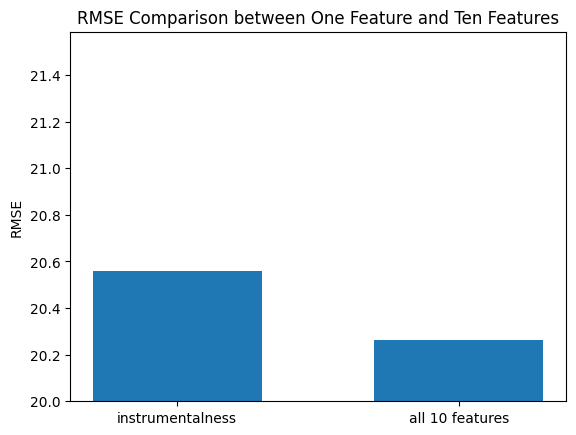

In [ ]:
plt.bar(x=['instrumentalness','all 10 features'],height=[np.sqrt(one_feature_mse), np.sqrt(selected_feature_mse)], width=0.6)
plt.ylabel('RMSE')
plt.ylim(20)
plt.title('RMSE Comparison between One Feature and Ten Features')
plt.show()

2. regularization

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))

    # ensure that the weight is an array
    weight = np.array(weight)
    # print(weight)
    # print(features[1])
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)

    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

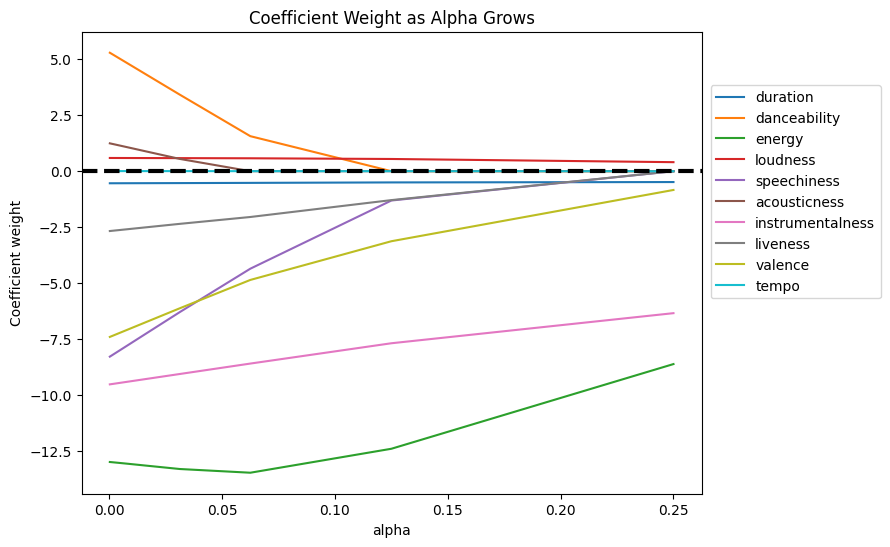

In [ ]:
alphas=[2.0**c for c in np.arange(-12, -1)]
lasso_weight = []
for alpha in alphas:
    lasso = Lasso(alpha = alpha) # Creates 3 output features per input feature c, x, x^2
    lasso.fit(X_train[selected_feature], y_train)
    lasso_weight.append(lasso.coef_)
# print(lasso_weight)
lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, selected_feature)

3. grid search

In [ ]:
Model = Lasso()
paramGrid = {'alpha': [2.0**c for c in np.arange(-12, -1)]}
gridSearch = GridSearchCV(Model, paramGrid, cv=5)
gridSearch.fit(X_train[selected_feature], y_train)
bestAlpha = gridSearch.best_params_['alpha']
finalModel = Lasso(alpha=bestAlpha)
finalModel.fit(X_train[selected_feature], y_train)
y_pred = finalModel.predict(X_test[selected_feature])

In [ ]:
lasso_coeff, best_alpha = finalModel.coef_, bestAlpha
lasso_coeff, best_alpha

(array([-5.38887077e-01,  5.29266527e+00, -1.29900260e+01,  5.91018430e-01,
        -8.28330999e+00,  1.24438437e+00, -9.52162786e+00, -2.67212118e+00,
        -7.40231777e+00,  4.91518909e-03]),
 0.000244140625)

In [ ]:
regularized_mse = mean_squared_error(y_test, y_pred)
np.sqrt(regularized_mse)

20.260956491654998

In [ ]:
(np.sqrt(regularized_mse) - np.sqrt(selected_feature_mse)) / np.sqrt(selected_feature_mse)

-1.8839088260056062e-06

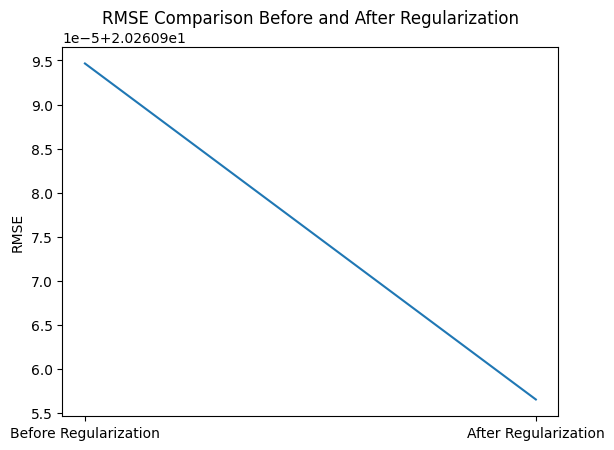

In [ ]:
plt.plot(['Before Regularization','After Regularization'],[np.sqrt(selected_feature_mse), np.sqrt(regularized_mse)])
plt.ylabel('RMSE')
plt.title('RMSE Comparison Before and After Regularization')
plt.show()

# Q6

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [ ]:
X6 = df_cleaned[selected_feature]
X6.head(), X6.shape

(   duration  danceability  energy  loudness  speechiness  acousticness  \
 0  3.844433         0.676  0.4610    -6.746       0.1430        0.0322   
 1  2.493500         0.420  0.1660   -17.235       0.0763        0.9240   
 2  3.513767         0.438  0.3590    -9.734       0.0557        0.2100   
 3  3.365550         0.266  0.0596   -18.515       0.0363        0.9050   
 4  3.314217         0.618  0.4430    -9.681       0.0526        0.4690   
 
    instrumentalness  liveness  valence    tempo  
 0          0.000001    0.3580    0.715   87.917  
 1          0.000006    0.1010    0.267   77.489  
 2          0.000000    0.1170    0.120   76.332  
 3          0.000071    0.1320    0.143  181.740  
 4          0.000000    0.0829    0.167  119.949  ,
 (45828, 10))

In [ ]:
pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA())])
pca_pipeline.fit(X6)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

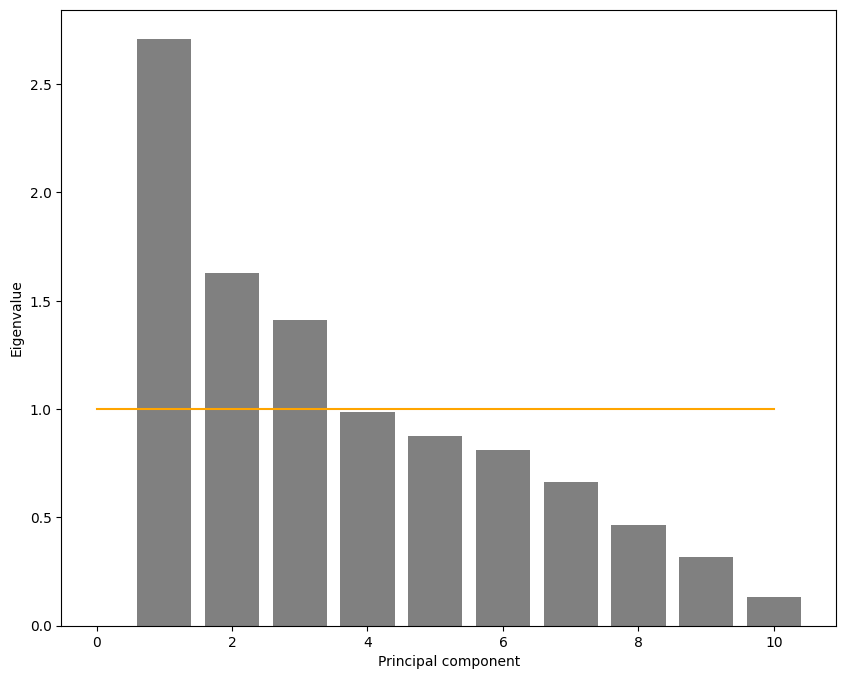

In [ ]:
eigVals=pca_pipeline[1].explained_variance_
nComponents = 10
x = np.linspace(1,nComponents, nComponents)
plt.figure(figsize=(10, 8))
plt.bar(x, eigVals, color='gray')
plt.plot([0,nComponents],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show() # 3 meaningful principal components according to Kaiser Criterion

In [ ]:
covarExplained = pca_pipeline[1].explained_variance_ratio_
print(covarExplained)
sum(covarExplained[:3])

[0.27082828 0.16305671 0.14101945 0.09878363 0.08745344 0.08114415
 0.06624406 0.04666643 0.03165562 0.01314823]


0.5749044359348746

In [ ]:
pca=PCA(3)
stand_X = StandardScaler().fit_transform(X6)
X_transformed=pca.fit_transform(stand_X)

In [ ]:
print(stand_X.shape)

(45828, 10)


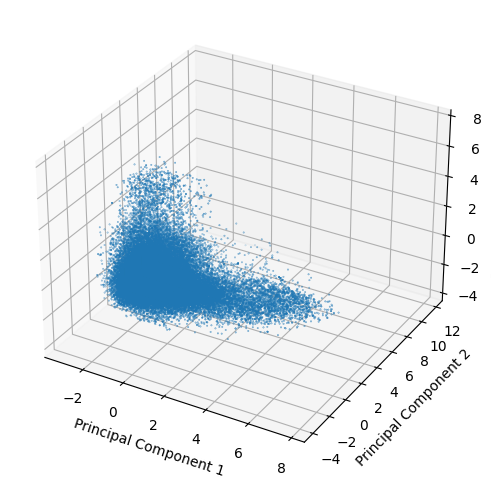

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points using the three principal components
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], s = 0.1)

# Set labels for the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()

 3 meaningful components, account for 57 percent of variance


In [ ]:
# Vivian pca visualization: https://plotly.com/python/pca-visualization/
import plotly.express as px

## version
# pip install ipykernel
# pip install --upgrade nbformat
# restart kernel

In [ ]:
n_components = 3
components = stand_X
total_var = pca.explained_variance_ratio_.sum() * 100
labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Popularity'

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
df_cleaned['track_genre'].nunique()

52

In [ ]:
from sklearn.cluster import KMeans as sk_KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
print(X6.shape)

(45828, 10)


In [ ]:
numClusters = 10
Q = np.empty([10,1])*np.NaN # init container to store sums

# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = sk_KMeans(n_clusters = int(ii)).fit(X6) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(X6,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum

/opt/anaconda3/envs/1001-lab/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/envs/1001-lab/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/envs/1001-lab/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/envs/1001-lab/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/anaconda3/envs/1001-lab/lib/python3.8/site-packages

<Figure size 1600x800 with 0 Axes>

In [ ]:
# check silhouette score when k=52
kMeans = sk_KMeans(n_clusters = 52).fit(X6) # compute kmeans using scikit
cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
s = silhouette_samples(X6,cId) # compute the mean silhouette coefficient of all samples
sum(s)

/opt/anaconda3/envs/1001-lab/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



13294.597760764336

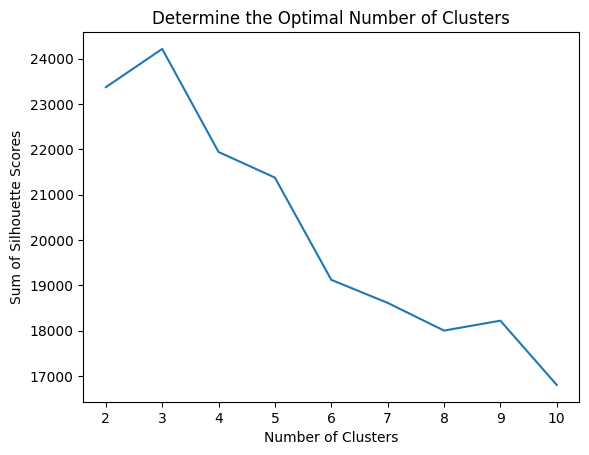

In [ ]:
plt.plot(np.linspace(2,11,num=10),Q)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Silhouette Scores')
plt.title('Determine the Optimal Number of Clusters')
plt.show()

# Q7

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  roc_auc_score, accuracy_score, classification_report

In [ ]:
X7 = df_cleaned['valence'].values.reshape(-1, 1)
y7 = df_cleaned['mode']

In [ ]:
print(X7)

[[0.715]
 [0.267]
 [0.12 ]
 ...
 [0.819]
 [0.529]
 [0.884]]


In [ ]:
y7.value_counts()

mode
1    28721
0    17107
Name: count, dtype: int64

In [ ]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=seed)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X7_train, y7_train)
y7_pred_logreg = logreg_model.predict(X7_test)
y7_pred_logreg_proba = logreg_model.predict_proba(X7_test)[:, 1]
fpr, tpr, _ = roc_curve(y7_test, y7_pred_logreg_proba)
log_auc = roc_auc_score(y7_test, y7_pred_logreg)

In [ ]:
log_auc

0.5

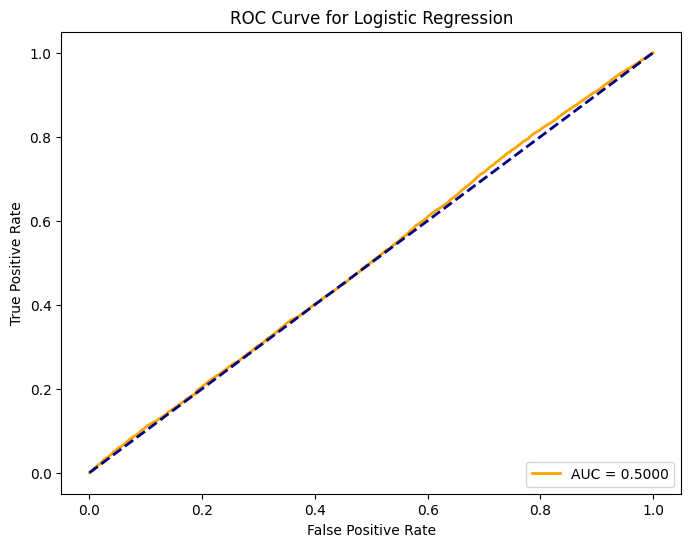

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {log_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X7_train, y7_train)
y7_pred_svm = svm_model.predict(X7_test)
y7_pred_svm_proba = svm_model.predict_proba(X7_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y7_test, y7_pred_svm_proba)
svc_auc = roc_auc_score(y7_test, y7_pred_svm)
svc_auc

0.5

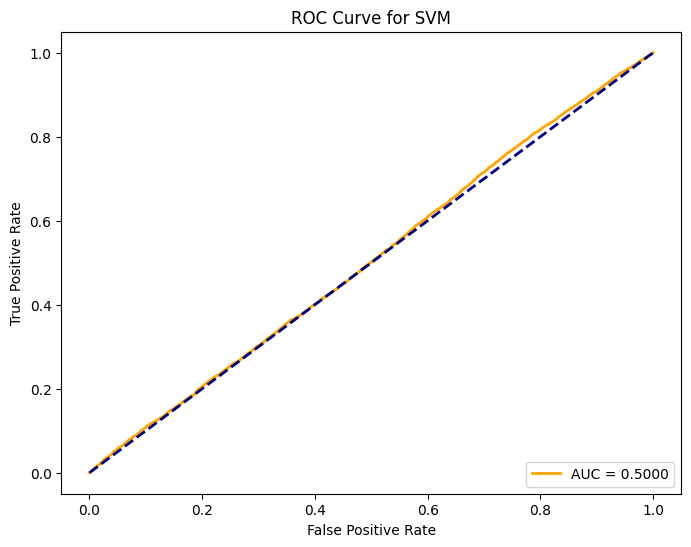

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label=f'AUC = {svc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model = RandomForestClassifier(random_state=seed).fit(X7_train, y7_train)
forest_predictions = forest_model.predict(X7_test)
y7_pred_rf_proba = forest_model.predict_proba(X7_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y7_test, y7_pred_rf_proba)
rf_auc = roc_auc_score(y7_test, forest_predictions)
rf_auc

0.5080271722382123

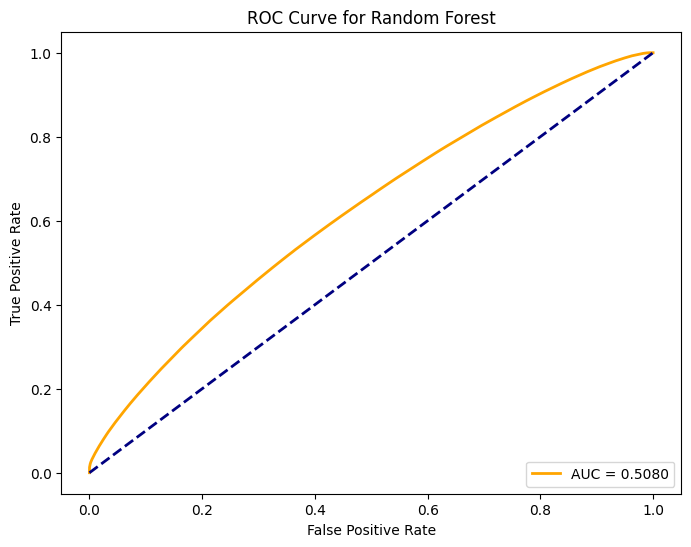

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label=f'AUC = {rf_auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

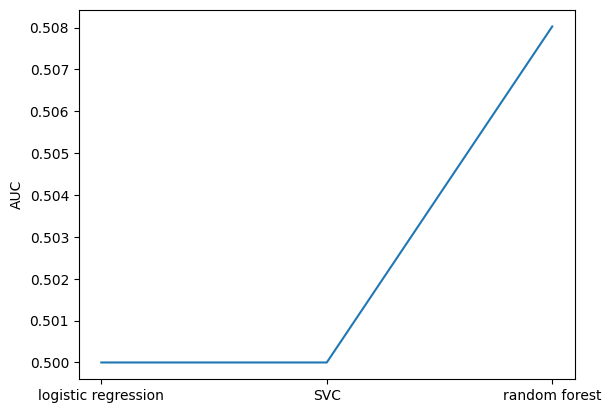

In [ ]:
plt.plot(['logistic regression','SVC','random forest'],[log_auc, svc_auc, rf_auc])
plt.ylabel('AUC')
plt.show()

# Q8

In [ ]:
#from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
import tensorflow as tf

2023-12-19 12:21:28.718330: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# use the result from PCA
X8 = X_transformed
#mlb = MultiLabelBinarizer()
#y = pd.DataFrame(mlb.fit_transform(df_cleaned['track_genre']), columns=mlb.classes_)
y8 = df_cleaned['track_genre']
y8.nunique()

52

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y8)
y_one_hot = tf.keras.utils.to_categorical(y_encoded)

In [ ]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y_one_hot, test_size=0.2, random_state=seed)
X8_train.shape, y8_train.shape

((36662, 3), (36662, 52))

In [ ]:
tf.random.set_seed(seed)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation="relu", input_shape=(X8_train.shape[1],)),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(y8.nunique(), activation="softmax")
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=tf.keras.metrics.AUC())

model_history = model.fit(X8_train, y8_train,epochs=50, validation_data=(X8_test, y8_test))

Epoch 1/50
1146/1146 [==============================] - 4s 2ms/step - loss: 3.3506 - auc: 0.7787 - val_loss: 3.2288 - val_auc: 0.8076
Epoch 2/50
1146/1146 [==============================] - 2s 2ms/step - loss: 3.1886 - auc: 0.8142 - val_loss: 3.1839 - val_auc: 0.8153
Epoch 3/50
1146/1146 [==============================] - 2s 1ms/step - loss: 3.1541 - auc: 0.8205 - val_loss: 3.1607 - val_auc: 0.8186
Epoch 4/50
1146/1146 [==============================] - 2s 1ms/step - loss: 3.1377 - auc: 0.8226 - val_loss: 3.1512 - val_auc: 0.8212
Epoch 5/50
1146/1146 [==============================] - 2s 2ms/step - loss: 3.1302 - auc: 0.8243 - val_loss: 3.1485 - val_auc: 0.8213
Epoch 6/50
1146/1146 [==============================] - 2s 2ms/step - loss: 3.1223 - auc: 0.8254 - val_loss: 3.1466 - val_auc: 0.8212
Epoch 7/50
1146/1146 [==============================] - 2s 2ms/step - loss: 3.1180 - auc: 0.8262 - val_loss: 3.1372 - val_auc: 0.8230
Epoch 8/50
1146/1146 [==============================] - 2s 2ms

In [ ]:
# Evaluate our model on the test set
loss_nn, auc_nn = model.evaluate(X8_test, y8_test)
print(f"Model loss on the test set: {loss_nn}")
print(f"Model accuracy on the test set: {auc_nn:.4f}")

287/287 [==============================] - 0s 1ms/step - loss: 3.1162 - auc: 0.8264
Model loss on the test set: 3.116189479827881
Model accuracy on the test set: 0.8264


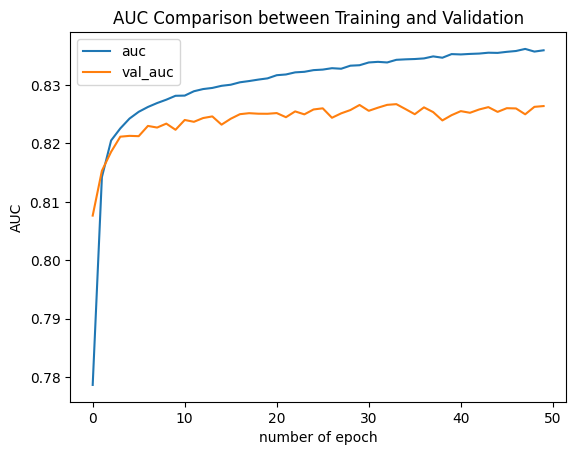

In [ ]:
pd.DataFrame(model_history.history).iloc[:, [1,3]].plot()
plt.xlabel('number of epoch')
plt.ylabel('AUC')
plt.title('AUC Comparison between Training and Validation')
plt.show()

# Q9

In [ ]:
ratings = pd.read_csv("starRatings.csv", header = None, dtype={'1724':'float64'})

In [ ]:
ratings.iloc[:,1724]

0       NaN
1       NaN
2       NaN
3       3.0
4       NaN
       ... 
9995    NaN
9996    NaN
9997    2.0
9998    NaN
9999    4.0
Name: 1724, Length: 10000, dtype: float64

In [ ]:
ratings.shape

(10000, 5000)

In [ ]:
common_songs = df_cleaned['songNumber'].tolist()
len(common_songs)

45828

In [ ]:
ratings_matched = ratings[ratings.columns.intersection(common_songs)]
kept = ratings_matched.shape[1]

In [ ]:
ratings_matched.head(), ratings_matched.shape

(   0     1     2     3     4     5     6     7     8     9     ...  4990  \
 0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
 1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
 2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
 3   NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
 4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   4.0   
 
    4991  4992  4993  4994  4995  4996  4997  4998  4999  
 0   0.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 2   2.0   1.0   NaN   NaN   3.0   NaN   NaN   NaN   0.0  
 3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 
 [5 rows x 4387 columns],
 (10000, 4387))

In [ ]:
all(ratings_matched.columns.to_list() == df_cleaned['songNumber'][:kept])

True

In [ ]:
average_rating = ratings_matched.mean()
average_rating

0       3.196939
1       1.361029
2       2.186377
3       1.576998
4       3.038835
          ...   
4995    0.833843
4996    2.368473
4997    0.914201
4998    0.890088
4999    0.795043
Length: 4387, dtype: float64

In [ ]:
popularity5k = df_cleaned['popularity'][:kept]

cor value

In [ ]:
import seaborn as sns
fig = sns.regplot(x=average_rating, y=popularity5k, marker='.', line_kws={'color':'red'})
fig.set(xlabel='average ratings', title='Correlation between Popularity and Average Ratings')

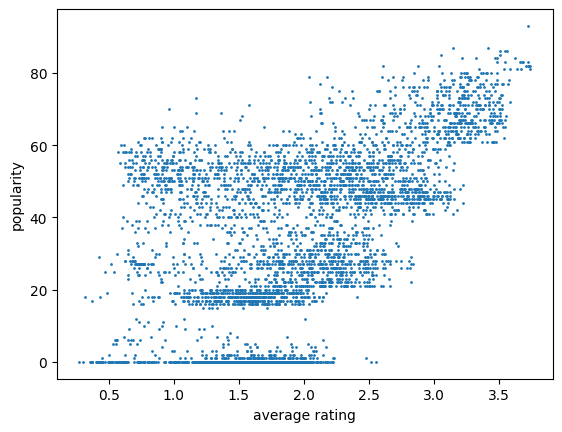

In [ ]:
plt.scatter(average_rating, popularity5k, s= 1)
plt.xlabel('average rating')
plt.ylabel('popularity')
plt.show()

In [ ]:
correlation_coefficient, p_value = ss.pearsonr(average_rating, popularity5k)

In [ ]:
correlation_coefficient, p_value

(0.5281081355563219, 1.0362133223e-313)

In [ ]:
songs5k = df_cleaned.iloc[:kept, :]
songs5k

songNumber                 artists  \
0              0             Gen Hoshino   
1              1            Ben Woodward   
2              2  Ingrid Michaelson;ZAYN   
3              3            Kina Grannis   
4              4        Chord Overstreet   
...          ...                     ...   
4995        4995        Ludovico Einaudi   
4996        4996                     Air   
4997        4997        Ludovico Einaudi   
4998        4998             Liquid Mind   
4999        4999             Liquid Mind   

                                             album_name  \
0                                                Comedy   
1                                      Ghost (Acoustic)   
2                                        To Begin Again   
3     Crazy Rich Asians (Original Motion Picture Sou...   
4                                               Hold On   
...                                                 ...   
4995                                  Elements (Deluxe)   
4996                                        Moon Safari   
4997                        Islands - Essential Einaudi   
4998                         Liquid Mind II: Slow World   
4999                         Liquid Mind XI: Deep Sleep   

                      track_name  popularity   duration  explicit  \
0                         Comedy          73   3.844433     False   
1               Ghost - Acoustic          55   2.493500     False   
2                 To Begin Again          57   3.513767     False   
3     Can't Help Falling In Love          71   3.365550     False   
4                        Hold On          82   3.314217     False   
...                          ...         ...        ...       ...   
4995                        Drop          49   5.004883     False   
4996       Kelly Watch the Stars          55   3.771550     False   
4997                    Passagio          50   5.962883     False   
4998                  Blue Seven          24  12.667550     False   
4999           Deep Sleep, Pt. 1          26   6.137100     False   

      danceability  energy  key  ...  mode  speechiness  acousticness  \
0           0.6760  0.4610    1  ...     0       0.1430        0.0322   
1           0.4200  0.1660    1  ...     1       0.0763        0.9240   
2           0.4380  0.3590    0  ...     1       0.0557        0.2100   
3           0.2660  0.0596    0  ...     1       0.0363        0.9050   
4           0.6180  0.4430    2  ...     1       0.0526        0.4690   
...            ...     ...  ...  ...   ...          ...           ...   
4995        0.4650  0.0342    2  ...     0       0.0401        0.9920   
4996        0.5160  0.7430    2  ...     1       0.0292        0.2820   
4997        0.2220  0.0200    9  ...     1       0.0464        0.9950   
4998        0.0576  0.1690   10  ...     1       0.0484        0.9030   
4999        0.1560  0.1260    0  ...     1       0.0389        0.9650   

      instrumentalness  liveness  valence    tempo  time_signature  \
0             0.000001    0.3580   0.7150   87.917               4   
1             0.000006    0.1010   0.2670   77.489               4   
2             0.000000    0.1170   0.1200   76.332               4   
3             0.000071    0.1320   0.1430  181.740               3   
4             0.000000    0.0829   0.1670  119.949               4   
...                ...       ...      ...      ...             ...   
4995          0.939000    0.1030   0.0590  152.054               4   
4996          0.637000    0.1110   0.2260  109.837               4   
4997          0.948000    0.0945   0.1190   85.860               4   
4998          0.966000    0.1170   0.0310   50.838               4   
4999          0.972000    0.1060   0.0341   74.775               4   

      track_genre                                                 id  
0        acoustic                      Gen Hoshino / Comedy / Comedy  
1        acoustic  Ben Woodward / Ghost (Acoustic) / Ghost - Acou...  
2       

top 10 songs

In [ ]:
songs5k.sort_values('popularity', ascending=False)[['track_name','popularity']].head(10)

track_name  popularity
2003     Sweater Weather          93
3300            Miss You          87
2000        Daddy Issues          87
2002            Softcore          86
3004             abcdefu          86
2106      Mr. Brightside          86
3006          In the End          85
2053               Creep          85
3255      Feel Good Inc.          84
2203  Losing My Religion          84

In [ ]:
popularity_base_top10 = songs5k.sort_values('popularity', ascending=False)['songNumber'].head(10)
popularity_base_top10

2003    2003
3300    3300
2000    2000
2002    2002
3004    3004
2106    2106
3006    3006
2053    2053
3255    3255
2203    2203
Name: songNumber, dtype: int64

In [ ]:
num_user = ratings.shape[0]

In [ ]:
popularity_base_recs = [popularity_base_top10.tolist()]*num_user

# Q10


In [ ]:
ratings_matched.index.name = 'user'
ratings_matched.reset_index(inplace=True)

In [ ]:
ratings_matched

user    0    1    2   3   4   5   6    7   8  ...  4990  4991  4992  \
0        0  NaN  NaN  NaN NaN NaN NaN NaN  NaN NaN  ...   NaN   0.0   NaN   
1        1  NaN  NaN  NaN NaN NaN NaN NaN  NaN NaN  ...   NaN   NaN   NaN   
2        2  NaN  NaN  NaN NaN NaN NaN NaN  NaN NaN  ...   NaN   2.0   1.0   
3        3  NaN  3.0  NaN NaN NaN NaN NaN  NaN NaN  ...   NaN   NaN   NaN   
4        4  NaN  NaN  NaN NaN NaN NaN NaN  NaN NaN  ...   4.0   NaN   NaN   
...    ...  ...  ...  ...  ..  ..  ..  ..  ...  ..  ...   ...   ...   ...   
9995  9995  NaN  0.0  0.0 NaN NaN NaN NaN  NaN NaN  ...   NaN   NaN   NaN   
9996  9996  NaN  NaN  NaN NaN NaN NaN NaN  NaN NaN  ...   NaN   NaN   NaN   
9997  9997  3.0  NaN  NaN NaN NaN NaN NaN  NaN NaN  ...   NaN   NaN   NaN   
9998  9998  NaN  NaN  NaN NaN NaN NaN NaN  NaN NaN  ...   0.0   NaN   NaN   
9999  9999  NaN  1.0  NaN NaN NaN NaN NaN  4.0 NaN  ...   NaN   1.0   NaN   

      4993  4994  4995  4996  4997  4998  4999  
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2      NaN   NaN   3.0   NaN   NaN   NaN   0.0  
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...    ...   ...   ...   ...   ...   ...   ...  
9995   NaN   NaN   NaN   NaN   NaN   NaN   0.0  
9996   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9997   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9998   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9999   NaN   NaN   0.0   NaN   NaN   NaN   NaN  

[10000 rows x 4388 columns]

In [ ]:
ratings_matched.isna().all().any()

False

In [ ]:
melted_df = pd.melt(ratings_matched, id_vars=['user'], var_name='item', value_name='rating')
melted_df = melted_df.dropna(subset=['rating'])

In [ ]:
melted_df.head()

user item  rating
8      8    0     2.0
15    15    0     3.0
16    16    0     0.0
24    24    0     4.0
31    31    0     3.0

In [ ]:
users = melted_df['user_id'].unique()
users.sort()

In [ ]:
users

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [ ]:
melted_group = melted_df.sort_values("rating", ascending=False).groupby("user_id")

In [ ]:
Y = list(map(lambda user: melted_group.get_group(user)["item"].values.astype(int).tolist(), users)) #Y[i] is songnumber rated by user i

In [ ]:
"""
how many of the top k recommended items are relevant to the user
"""
def average_precision_at_k(actual, predicted, k=10):
  k = min(k,min(len(actual), len(predicted)))
  # if len(actual) > k: # e.g. take the top 10 movies for each user based on actual data
  #   actual = actual[:k]
  # if len(predicted) > k: # e.g. subset top 10 movies for that user
  #   predicted = predicted[:k]

  average_precision = 0.0

  # List of T/F values corresponding to every predicted movie indicating whether it is in the ground truth or not.
  relevant_inds = np.asarray([movie in actual for movie in predicted]) # for every movie index in the actuals, is the movie in predicted
  #print ("relevant_inds", relevant_inds)

  num_relevant = np.sum(relevant_inds*1) # k-sized array [T, F ...  T] or [1, 0 ... 1]
  #print ("num_relevant", num_relevant)

  if num_relevant == 0: # if no trues, then return 0
    return 0

  #  precision calculated at each index i of the predicted list.
  # Precision at index i is the number of relevant items found in the top i+1 predictions divided by i+1
  precision_at_k = np.asarray([(np.sum(relevant_inds[:i+1]*1.0)/(i+1)) for i in range(k)])
  #print ("precision_at_k", precision_at_k)

  for ind in range(k):
    if relevant_inds[ind]:
      average_precision += precision_at_k[ind]

  average_precision /= num_relevant
  return average_precision
def mean_average_precision_at_k(actual, predicted, k=10):
  # Here, actual/ground truth will be of the shape (num_users, num_movies)
  # We will run the average_precision_at_k function for every user and then take the mean of those values

  mean_average_precision = 0.0

  for user_ind in range(len(actual)):
    user_recommendation = predicted[user_ind]
    user_actual = actual[user_ind]

    ap = average_precision_at_k(user_actual, user_recommendation, k)

    mean_average_precision += ap

  mean_average_precision /= len(actual)

  return mean_average_precision

 method 2

In [ ]:
def get_top_10(row):
    non_nan_values = row.dropna().nlargest(10)
    top_col_names = non_nan_values.index.tolist()
    return top_col_names


result = ratings_matched.apply(get_top_10, axis=1)

In [ ]:
def get_top_gt_threshold(row, threshold):
    above_threshold = row[row > threshold]
    top_col_names = above_threshold.index.tolist()
    return top_col_names

threshold = 3
result_gt_threshold = ratings_matched.apply(get_top_gt_threshold, args=(threshold,), axis=1)

In [ ]:
#mean_average_precision_at_k(Y, popularity_base_recs) # Y is list of songs that have explicit rating

In [ ]:
map_pop = mean_average_precision_at_k(result, popularity_base_recs) #  result is top 10 rated songs for each user, ground truth

In [ ]:
map_pop

0.008716706349206347

In [ ]:
#mean_average_precision_at_k(result_gt_threshold, popularity_base_recs) # list of songs with rating higher than threshold for each user

In [ ]:
pip install lenskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1


In [ ]:
from lenskit import batch,  Recommender
from lenskit.algorithms import item_knn

In [ ]:
algo = item_knn.ItemItem(nnbrs=10)
rec= Recommender.adapt(algo)
rec.fit(melted_df)
all_recs = batch.recommend(rec, melted_df.user.unique(), n=10)

/usr/local/lib/python3.10/dist-packages/lenskit/data/matrix.py:47: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  items = pd.Index(np.unique(ratings.item), name='item')
/usr/local/lib/python3.10/dist-packages/lenskit/data/matrix.py:47: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  items = pd.Index(np.unique(ratings.item), name='item')


In [ ]:
recs_group = all_recs.sort_values("rank", ascending=False).groupby("user")

In [ ]:
rec_item_list = list(map(lambda user: recs_group.get_group(user)["item"].values.astype(int).tolist(), all_recs['user'].unique()))

In [ ]:
map_collab = mean_average_precision_at_k(result, rec_item_list)

In [ ]:
(map_collab - map_pop) / map_pop

-0.03216774939565836

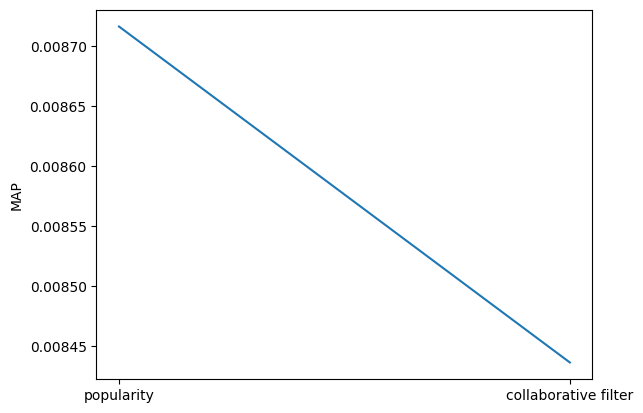

In [ ]:
plt.plot(['popularity','collaborative filter'],[map_pop, map_collab])
plt.ylabel('MAP')
plt.show()

# extra

since energy  tries to quantify how “hard” a
song goes. Intense songs have more energy, while softer songs have lower energy. it is reasonable to assume that harder songs will have faster temp because faster pace generally comes with greater energy. is there a relationship between energy and temp?

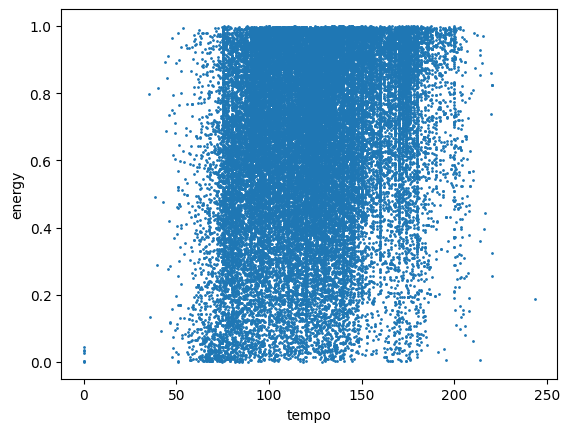

In [ ]:
plt.scatter(df_cleaned['tempo'], df_cleaned['energy'], s= 1)
plt.xlabel('tempo')
plt.ylabel('energy')
plt.show()

In [ ]:
ss.pearsonr(df_cleaned['tempo'], df_cleaned['energy']) # positive correlation

PearsonRResult(statistic=0.24503705533581682, pvalue=0.0)